In [8]:
%load_ext autoreload
from pathlib import Path

In [22]:
%autoreload 2

from process.parse_markdown import load_content
from process.graph import DocumentGraph

In [56]:
content_directory = Path("process/test-content")
doc_map = load_content(content_directory)
graph = DocumentGraph(doc_map=doc_map)

In [50]:
graph.props.edge.predicate

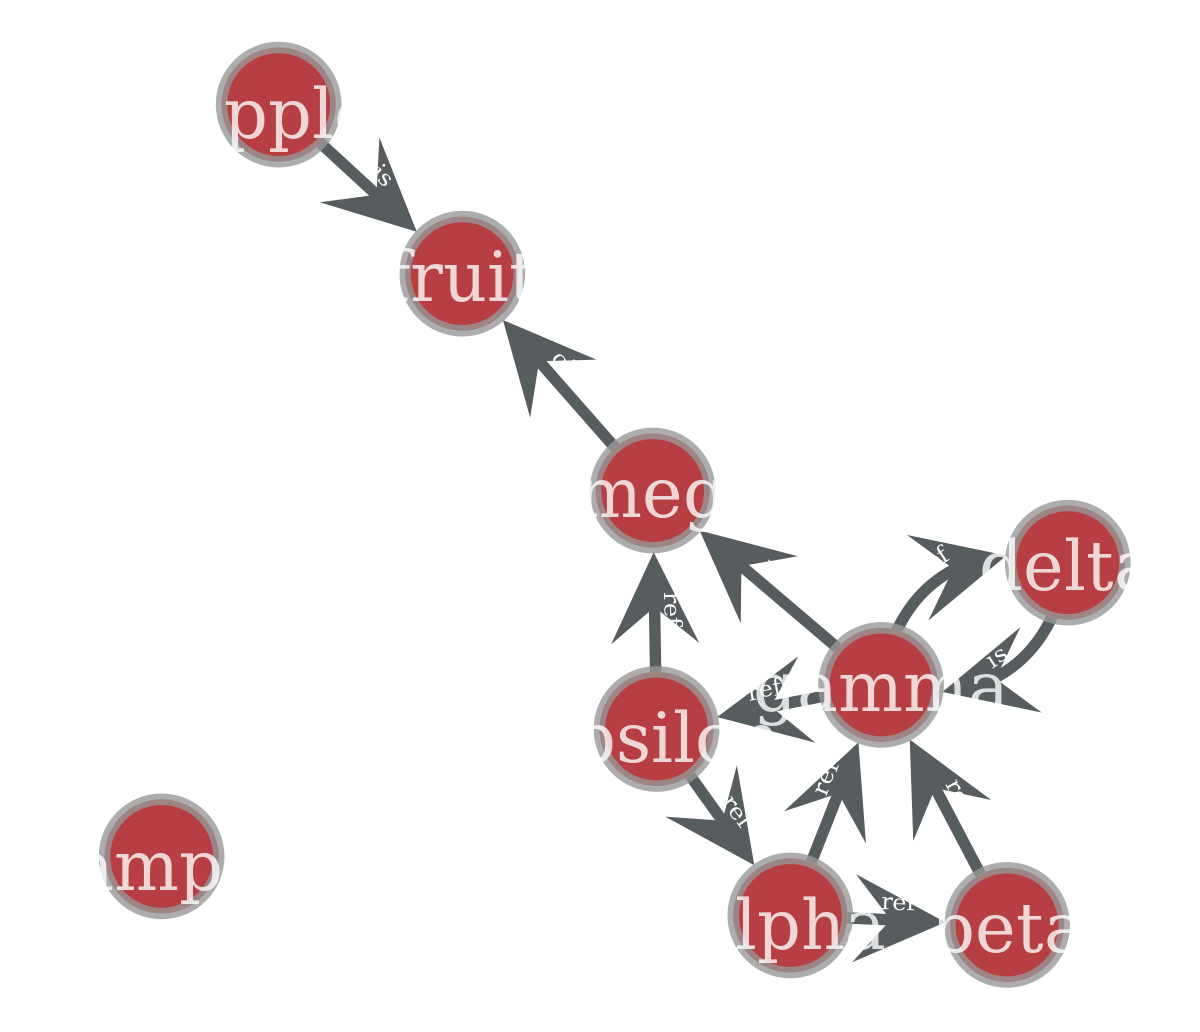

In [57]:
graph.draw(edge_text=graph.props.edge.predicates, edge_text_color="white", edge_font_size=12)